<a href="https://colab.research.google.com/github/arjunparmar/IPL-2020/blob/master/Housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import h5py
import math
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
data = pd.read_csv("kc_house_data.csv")
display(data.tail())
train_data = data[: (int((len(data))*0.8))]
test_data = data[(int((len(data))*0.8)) :]                    

# """def correlation(data, threshold):
#     col_corr = set() # Set of all the names of deleted columns
#     corr_matrix = data.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
#                 colname = corr_matrix.columns[i] # getting the name of column
#                 col_corr.add(colname)
#                 if colname in data.columns:
#                     del data[colname] # deleting the column from the dataset
#     return data                

# data = correlation(data,0.5)
# print(data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
X_train = np.array(train_data.drop(["id","date","price"] , axis = 1).copy()).T
Y_train = np.array([train_data['price'].copy()])

X_test = np.array(test_data.drop(["id","date","price"] , axis = 1).copy()).T
Y_test = np.array([test_data['price'].copy()])

In [ ]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(18, 17290)
(1, 17290)
(18, 4323)
(1, 4323)


In [ ]:
mean = np.array([np.mean(X_train , axis = 1)]).T  #normalizing the training set
max = np.array([np.max(X_train , axis = 1)]).T
min = np.array([np.min(X_train , axis=1)]).T
X_train = ((X_train - mean) / (max - min))

print(X_train.shape)
print(Y_train.shape)

mean = np.array([np.mean(X_test , axis = 1)]).T  #normalizing the test set
max = np.array([np.max(X_test , axis = 1)]).T
min = np.array([np.min(X_test , axis=1)]).T
X_test = ((X_test - mean) / (max - min))

print(X_test.shape)
print(Y_test.shape)



(18, 17290)
(1, 17290)
(18, 4323)
(1, 4323)


In [ ]:
X_train = X_train.T                             #increasing features of X_train
for j in range(X_train.shape[1]) :
  a = np.copy(X_train[:,j]) 
  for i in range(2,7) :


    if i==2:
      temp = np.array([np.power(a,i)]).T
    elif i==3:
      temp = np.array([np.power(a,i)]).T        
    # elif i == 4:
    #   temp = np.array([np.sin(a)*np.sin(a)*np.sin(a)]).T
    # elif i == 5:
    #   temp = np.array([np.power(a,i)]).T  
    # if i == 2 :
    #   temp = np.array([np.sin(a)]).T
    # elif i == 7:
    #   temp = np.array([np.sin(a)*np.sin(a)*np.sin(a)*np.sin(a)*np.sin(a)]).T      

    else:
      temp = np.array([a*X_train[:,j+1]]).T                 
    print(temp.shape)
    X_train = np.hstack((X_train,temp))
X_train = X_train.T
print(X_train.shape)


X_test = X_test.T                             #increasing features of X_train
for j in range(X_test.shape[1]) :
  a = np.copy(X_test[:,j]) 
  for i in range(2,7) :

    if i==2:
      temp = np.array([np.power(a,i)]).T
    elif i==3:
      temp = np.array([np.power(a,i)]).T        
    # elif i == 4:
    #   temp = np.array([np.sin(a)*np.sin(a)*np.sin(a)]).T
    # if i == 2:
    #   temp = np.array([np.power(a,i)]).T  
    # elif i == 6 :
    #   temp = np.array([np.sin(a)]).T
    # elif i == 7:
    #   temp = np.array([np.sin(a)*np.sin(a)*np.sin(a)*np.sin(a)*np.sin(a)]).T      

    else:
      temp = np.array([a*X_test[:,j+1]]).T                 
    print(temp.shape)
    X_test = np.hstack((X_test,temp))
X_test = X_test.T
print(X_test.shape)


(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(17290, 1)
(108, 1729

In [ ]:
#initialize_parameters
parameters={}
parameters["W"] = np.random.randn(1,X_train.shape[0])
parameters["b"] = np.zeros((1,1))

In [ ]:
def linear_regression_test(X,Y,parameters):
  

  #forward
    H_test = np.dot(parameters["W"],X) + parameters["b"]

    return H_test



In [ ]:

def linear_regression_train(X,Y,num_iterations,learning_rate):
  m=X.shape[1]

  for i in range(num_iterations):


  #forward
    H_train = np.dot(parameters["W"],X) + parameters["b"]

  #cost
    cost = (1/(2*m))*(np.sum(np.power((H_train-Y),2)))/(100000000)
    
  #backprop

    dW = (1/m)*(np.dot((H_train-Y),X.T))
    db = (1/m)*(np.sum(H_train-Y))

  #update

    parameters["W"]  = parameters["W"]  - learning_rate*dW
    parameters["b"]  = parameters["b"]  - learning_rate*db

   #R2_score of test
    H_test =linear_regression_test(X_test,Y_test,parameters)
    from sklearn.metrics import r2_score
    r2 = r2_score(Y_test.T,H_test.T)

    print("cost={} ,iteration={} ,r2_score ={}".format(cost,i,r2))

    


  return parameters,H_train



In [ ]:
parameters,H_train =linear_regression_train(X_train,Y_train,num_iterations=30000,learning_rate=0.8)
#print(parameters["W"])

Streaming output truncated to the last 5000 lines.
cost=125.48055369910699 ,iteration=25001 ,r2_score =0.7469762281715644
cost=125.48046861771441 ,iteration=25002 ,r2_score =0.7469760287483709
cost=125.48038354319964 ,iteration=25003 ,r2_score =0.7469758293245601
cost=125.48029847556165 ,iteration=25004 ,r2_score =0.7469756299001326
cost=125.48021341479935 ,iteration=25005 ,r2_score =0.7469754304750896
cost=125.48012836091164 ,iteration=25006 ,r2_score =0.746975231049432
cost=125.48004331389738 ,iteration=25007 ,r2_score =0.7469750316231605
cost=125.47995827375553 ,iteration=25008 ,r2_score =0.7469748321962763
cost=125.47987324048498 ,iteration=25009 ,r2_score =0.74697463276878
cost=125.47978821408465 ,iteration=25010 ,r2_score =0.7469744333406727
cost=125.4797031945534 ,iteration=25011 ,r2_score =0.7469742339119552
cost=125.47961818189015 ,iteration=25012 ,r2_score =0.7469740344826286
cost=125.47953317609382 ,iteration=25013 ,r2_score =0.7469738350526935
cost=125.47944817716333 ,itera

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_train.T,H_train.T)
print(r2)

0.8132955343434067


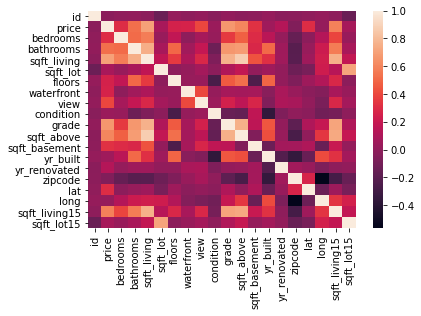

In [ ]:
corr = data.corr()
sns.heatmap(corr)